<a href="https://colab.research.google.com/github/QueensRD/Final-Project/blob/main/final_project_russ_dixson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Does Squirrel activity correlate with iteractions with humans
MAYBE DO WHICH TRAIT CORRELATES THE MOST WITH SQUIRREL ACTIVITY (i.e. color or park)

Checklist
- [x] drop useless collumns like color notes and/or other notes
- [x] drop NAs
- [x] Create new collumns for activities and interactions with humans into True/False
- [x] graph populations
- [x] find correlations between activities and avoidant or interactive behavior
- [x] explore other factors (i.e squirrel type and location)
- [x] graph squirrel location

In [1]:
import pandas as pd, scipy.stats as stats, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/squirrel-data.csv', encoding='latin-1')
df.head()

Mounted at /content/drive


,Area Name,Area ID,Park Name,Park ID,Squirrel ID,Primary Fur Color,Highlights in Fur Color,Color Notes,Location,Above Ground (Height in Feet),Specific Location,Activities,Interactions with Humans,Other Notes or Observations,Squirrel Latitude (DD.DDDDDD),Squirrel Longitude (-DD.DDDDDD)
0,UPPER MANHATTAN,A,Fort Tryon Park,1,A-01-01,Gray,White,NaN,Ground Plane,NaN,NaN,Foraging,Indifferent,NaN,40.859410,-73.933936
1,UPPER MANHATTAN,A,Fort Tryon Park,1,A-01-02,Gray,White,NaN,Ground Plane,NaN,NaN,Foraging,Indifferent,Looks skinny,40.859436,-73.933937
2,UPPER MANHATTAN,A,Fort Tryon Park,1,A-01-03,Gray,White,NaN,Ground Plane,NaN,NaN,"Eating, Digging something",Indifferent,NaN,40.859416,-73.933894
3,UPPER MANHATTAN,A,Fort Tryon Park,1,A-01-04,Gray,White,NaN,Ground Plane,NaN,NaN,Running,Indifferent,NaN,40.859418,-73.933895
4,UPPER MANHATTAN,A,Fort Tryon Park,1,A-01-05,Gray,Cinnamon,NaN,Ground Plane,NaN,NaN,"Running, Eating",Indifferent,She left food,40.859493,-73.933590


This cell removes any "useless" columns to declutter the dataframe

In [2]:
# removing useless columns
df = df.drop(['Color Notes','Other Notes or Observations','Highlights in Fur Color','Area Name','Above Ground (Height in Feet)','Specific Location'], axis=1)
df.head()

,Area ID,Park Name,Park ID,Squirrel ID,Primary Fur Color,Location,Activities,Interactions with Humans,Squirrel Latitude (DD.DDDDDD),Squirrel Longitude (-DD.DDDDDD)
0,A,Fort Tryon Park,1,A-01-01,Gray,Ground Plane,Foraging,Indifferent,40.859410,-73.933936
1,A,Fort Tryon Park,1,A-01-02,Gray,Ground Plane,Foraging,Indifferent,40.859436,-73.933937
2,A,Fort Tryon Park,1,A-01-03,Gray,Ground Plane,"Eating, Digging something",Indifferent,40.859416,-73.933894
3,A,Fort Tryon Park,1,A-01-04,Gray,Ground Plane,Running,Indifferent,40.859418,-73.933895
4,A,Fort Tryon Park,1,A-01-05,Gray,Ground Plane,"Running, Eating",Indifferent,40.859493,-73.933590


This creates new columns. It reads through the "Interactions with Humans" column and sorted them into four activity cateogories. Two behavioral categories (interactive vs avoidant) were created based on the activity types. Interactive behaviors are activities with keywords of interactive, friendly, approaches, interested in, and vocalization. Avoidant behaviors were sorted by keywords of indifferent, runs from, watching, staring, defending, skittish to humans, and defending.

In [3]:
# Creating collumns with True/False values to be used in correlation analysis

print(df['Activities'].unique()) # For finding unique activies
print(df['Interactions with Humans'].unique()) # For finding the unique interactions between humans and squirrels

df['Eating'] = df['Activities'].str.contains('Eating') # Creates collumn for any activity regarding eating as 'true'
df['Foraging'] = df['Activities'].str.contains('Foraging') # Creates collumn for any activity regarding foraging as 'true'
df['Running'] = df['Activities'].str.contains('Running') # Creates collumn for any activity regarding running as 'true'
df['Chasing'] = df['Activities'].str.contains('Chasing') # Creates collumn for any activity regarding chasing as 'true'
df['Interactive'] = df['Interactions with Humans'].str.contains('Interactive|Friendly|Approaches|Interested in|Vocalization') # Sorts 'friendly' behavior as true
df['Avoidant'] = df['Interactions with Humans'].str.contains('Indifferent|Runs From|Watching|Staring|Defending|Skittish to humans|Defending') # Sorts 'unfriendly' or avoidant behaviors as true
df.rename(columns={'Squirrel Latitude (DD.DDDDDD)': 'Latitude','Squirrel Longitude (-DD.DDDDDD)': 'Longitude'},inplace=True)
df.drop(['Activities', 'Interactions with Humans'], axis=1, inplace=True)
df.head()

['Foraging' 'Eating, Digging something' 'Running' 'Running, Eating'
 'Climbing' 'Eating, Digging' nan 'Foraging, Nesting/gathering leaves'
 'Chasing' 'Eating' 'Sleeping' 'Sitting' 'Chasing, Climbing'
 'Chasing, Climbing, Eating' 'Running, Chasing, Climbing'
 'Climbing, Foraging' 'Vocalization at us' 'Running, Foraging'
 'Jumped to building' 'Eating, Foraging' 'Climbing, Eating'
 'Running, up tree' 'Sitting on branch' 'Sitting at attention'
 'Sitting, shouting' 'Defending tree, shouting' 'Cleaning'
 'Resting in tree' 'Running, Climbing, Foraging'
 'Running, Eating, Foraging' 'Digging' 'Running, Digging' 'Grooming'
 'Nesting' 'Climbing (down tree)' 'Sitting (in tree hole)' 'Lounging'
 'Climbing (down)' 'Running, Eating (peanuts)' 'Climbing, Watching #2'
 'Running, Chasing, Eating' 'Climbing, Eating, Foraging'
 'Running, Chasing' 'Running, Climbing, Eating' 'Ear scratching'
 'Frolicking' 'Running, Climbing, Scratching' 'Running, Climbing' 'Posing'
 'Guarding' 'Running, Eating (or pretendi

,Area ID,Park Name,Park ID,Squirrel ID,Primary Fur Color,Location,Latitude,Longitude,Eating,Foraging,Running,Chasing,Interactive,Avoidant
0,A,Fort Tryon Park,1,A-01-01,Gray,Ground Plane,40.859410,-73.933936,False,True,False,False,False,True
1,A,Fort Tryon Park,1,A-01-02,Gray,Ground Plane,40.859436,-73.933937,False,True,False,False,False,True
2,A,Fort Tryon Park,1,A-01-03,Gray,Ground Plane,40.859416,-73.933894,True,False,False,False,False,True
3,A,Fort Tryon Park,1,A-01-04,Gray,Ground Plane,40.859418,-73.933895,False,False,True,False,False,True
4,A,Fort Tryon Park,1,A-01-05,Gray,Ground Plane,40.859493,-73.933590,True,False,True,False,False,True


Squirrel population by park

<ipython-input-4-03c599fc40e2>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pop_chart.set_xticklabels(pop_chart.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Fort Tryon Park'),
 Text(1, 0, 'J. Hood Wright Park'),
 Text(2, 0, 'Highbridge Park'),
 Text(3, 0, 'St. Nicholas Park'),
 Text(4, 0, 'Riverside Park (Section Near Grant Memorial)'),
 Text(5, 0, 'Marcus Garvey Park'),
 Text(6, 0, 'Madison Square Park'),
 Text(7, 0, 'Union Square Park'),
 Text(8, 0, 'Stuyvesant Square Park'),
 Text(9, 0, 'Washington Square Park'),
 Text(10, 0, 'Tompkins Square Park'),
 Text(11, 0, 'John V. Lindsay East River Park'),
 Text(12, 0, 'Seward Park'),
 Text(13, 0, 'Corlears Hook Park'),
 Text(14, 0, 'Columbus Park'),
 Text(15, 0, 'Teardrop Park'),
 Text(16, 0, 'City Hall Park'),
 Text(17, 0, 'Battery Park'),
 Text(18, 0, 'Msgr. McGolrick Park'),
 Text(19, 0, 'McCarren Park')]

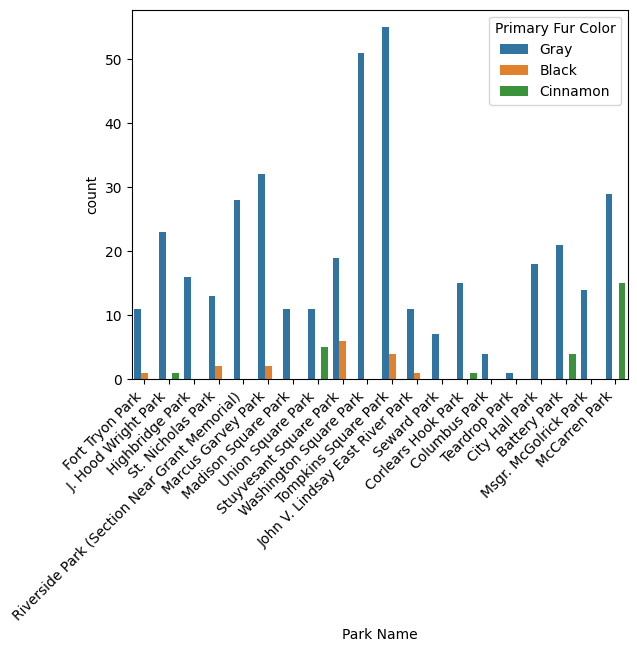

In [4]:
# Graphing squirrel population per location

pop_chart = sns.countplot(x='Park Name', data=df, hue='Primary Fur Color')
pop_chart.set_xticklabels(pop_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Exploring other correlations between different activity types (i.e. Eating and Foraging). Nan cells will be dropped in order to run the statistical analysis. The number of Nan cells dropped will be printed. This is done to see how many values were dropped (if a lot of values were dropped, this will need to be considered in results).

In [5]:
# Calculating NANs in the True/False column (It will be important to see how many values are being potentionally dropped)

for col in df.columns: # goes through columns and prints the number of nan(s) present
  print(f'Number of NANs {df[col].value_counts(dropna=False)}')

df = df.dropna() # drops rows with nan values, can potentionally impact results

# sets the true/false values as 1 or 0 (will be needed in statistical tests in the future)
df['Eating'] = df['Eating'].astype(int)
df['Foraging'] = df['Foraging'].astype(int)
df['Running'] = df['Running'].astype(int)
df['Chasing'] = df['Chasing'].astype(int)
df['Interactive'] = df['Interactive'].astype(int)
df['Avoidant'] = df['Avoidant'].astype(int)

# creates a new dataframe with the values specified to be analyzed later
intdf = df[['Eating','Foraging','Running','Chasing','Interactive','Avoidant']] # these will are T/F values turned into ints and will be compared to eachother

Number of NANs Area ID
B    174
A    129
C     72
D     58
Name: count, dtype: int64
Number of NANs Park Name
Tompkins Square Park                            59
Washington Square Park                          51
McCarren Park                                   44
Marcus Garvey Park                              34
Riverside Park (Section Near Grant Memorial)    28
Battery Park                                    26
Stuyvesant Square Park                          25
J. Hood Wright Park                             24
City Hall Park                                  18
Union Square Park                               16
Highbridge Park                                 16
Corlears Hook Park                              16
St. Nicholas Park                               15
Msgr. McGolrick Park                            14
Fort Tryon Park                                 12
John V. Lindsay East River Park                 12
Madison Square Park                             11
Seward Park            

<ipython-input-5-57e2aec7f018>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Eating'] = df['Eating'].astype(int)
<ipython-input-5-57e2aec7f018>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Foraging'] = df['Foraging'].astype(int)
<ipython-input-5-57e2aec7f018>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Calculating the correlation between eating, foraging, running, and chasing with interractivity and avoidant behavior. The correlation is calculated using a pearson test. The intdf dataframe created frame is iterated through. The results are then printed along whether the Correlation is positive or negative, and if the results are statistically significant.

In [6]:
# Calculates statistically significant correlations between each activity type column and behavior type column

from scipy.stats import pearsonr # importing pearsonr to test correlation (r) and p value (p)

for col in intdf.columns: # New dataframe created in prior cell
  for col2 in intdf.columns:
    if col != col2:
      if col != 'Interactive' and col != 'Avoidant':
        r, p = pearsonr(df[col], df[col2])
        if p < 0.05:
          print(f'The relationship between {col} and {col2} is significant')
          print(f'r value: {r} p value: {p}')
          if r > 0:
            print(f'{col} and {col2} are positively correlated')
            print('\n')
          elif r < 0:
            print(f'{col} and {col2} are negatively correlated')
            print('\n')

The relationship between Eating and Interactive is significant
r value: 0.22255297617776418 p value: 0.0010461683365754176
Eating and Interactive are positively correlated


The relationship between Eating and Avoidant is significant
r value: -0.1787312236965867 p value: 0.008781820221527552
Eating and Avoidant are negatively correlated


The relationship between Foraging and Running is significant
r value: -0.2615807264686768 p value: 0.00010802793598351541
Foraging and Running are negatively correlated


The relationship between Foraging and Chasing is significant
r value: -0.2599865933715143 p value: 0.00011939219065206992
Foraging and Chasing are negatively correlated


The relationship between Foraging and Avoidant is significant
r value: 0.13478797010617133 p value: 0.04892725427607176
Foraging and Avoidant are positively correlated


The relationship between Running and Foraging is significant
r value: -0.26158072646867675 p value: 0.00010802793598351541
Running and Foraging are

Squirrel Color and behavior graphed. Behavior is split in each squirrel type.

<ipython-input-7-500df34967b0>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, '0'), Text(1, 0, '1')]

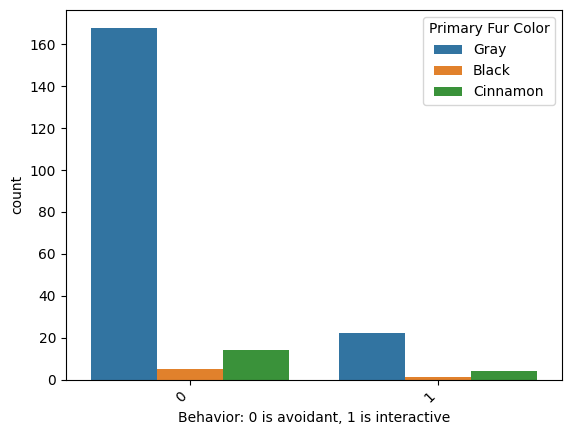

In [7]:
# Type of squirrel and behavior (Primary Fur Color)
chart = sns.countplot(x='Interactive', data=df, hue='Primary Fur Color')
chart.set_xlabel('Behavior: 0 is avoidant, 1 is interactive')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Anova test to see if there is a significance difference between Squirrel type and behavior

In [8]:
Squirrel_type_behavior_df = df[['Primary Fur Color','Eating','Foraging','Running','Chasing','Interactive','Avoidant']]
Squirrel_type_behavior_df['Gray'] = Squirrel_type_behavior_df['Primary Fur Color'].str.contains('Gray')
Squirrel_type_behavior_df['Cinnamon'] = Squirrel_type_behavior_df['Primary Fur Color'].str.contains('Cinnamon')
Squirrel_type_behavior_df['Black'] = Squirrel_type_behavior_df['Primary Fur Color'].str.contains('Black')


# anova tests for interactive and
fg, rg = stats.f_oneway(Squirrel_type_behavior_df['Gray'], Squirrel_type_behavior_df['Interactive']) #ANOVA test
afg, arg = stats.f_oneway(Squirrel_type_behavior_df['Gray'], Squirrel_type_behavior_df['Avoidant'])
fc, rc = stats.f_oneway(Squirrel_type_behavior_df['Cinnamon'], Squirrel_type_behavior_df['Interactive'])
caf, arc = stats.f_oneway(Squirrel_type_behavior_df['Cinnamon'], Squirrel_type_behavior_df['Avoidant'])
fb, rb = stats.f_oneway(Squirrel_type_behavior_df['Black'], Squirrel_type_behavior_df['Interactive'])
afb, arb = stats.f_oneway(Squirrel_type_behavior_df['Black'], Squirrel_type_behavior_df['Avoidant'])

#f, r = stats.f_oneway(Squirrel_type_behavior_df['Primary Fur Color'], Squirrel_type_behavior_df['Interactive'])
#print(f, r)

print(f'Anova test for Gray and Interactive f value: {fg} r value: {rg}\nAnova test for Gray and Avoidant f value: {afg} r value: {arg}\n')
print(f'Anova test for Cinnamon and Interactive f value: {fc} r value: {rc}\nAnova test for Cinnamon and Avoidant f value: {caf} r value: {arc}\n')
print(f'Anova test for Black and Interactive f value: {fb} r value: {rb}\nAnova test for Black and Avoidant f value: {afb} r value: {arb}\n')

Anova test for Gray and Interactive f value: 588.9475491726507 r value: 2.4899519152286966e-82
Anova test for Gray and Avoidant f value: 0.34889434889434895 r value: 0.5550529091649312

Anova test for Cinnamon and Interactive f value: 2.0115424973767073 r value: 0.1568376407611265
Anova test for Cinnamon and Avoidant f value: 688.1538461538462 r value: 5.700448259477547e-91

Anova test for Black and Interactive f value: 14.917103382563134 r value: 0.00012979763782294693
Anova test for Black and Avoidant f value: 1068.9591078066912 r value: 3.369860419694517e-118



<ipython-input-8-4673c43494ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Squirrel_type_behavior_df['Gray'] = Squirrel_type_behavior_df['Primary Fur Color'].str.contains('Gray')
<ipython-input-8-4673c43494ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Squirrel_type_behavior_df['Cinnamon'] = Squirrel_type_behavior_df['Primary Fur Color'].str.contains('Cinnamon')
<ipython-input-8-4673c43494ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

Ploting interactivity levels (interactive vs avoidant) by longitude and Latitude across all squirrels.

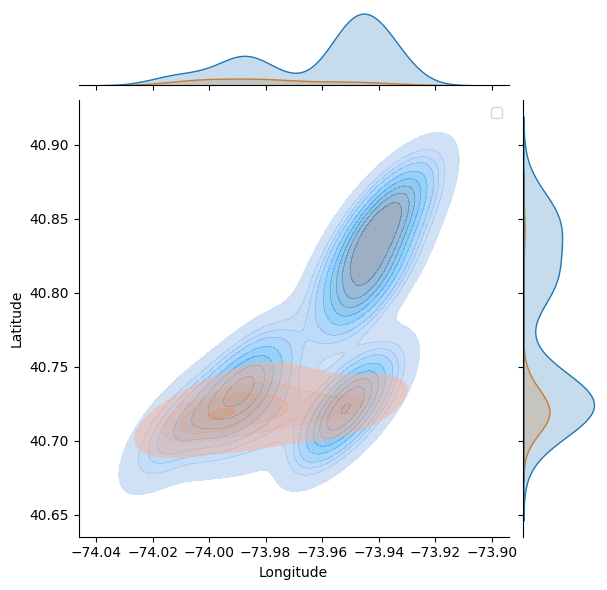

In [9]:
df['classify'] = np.where(df['Interactive'] == 1, 'Interactive', 'Avoidant')
squirrel_interactivity_by_long_and_lat = sns.jointplot(x='Longitude', y='Latitude', data=df, kind='kde', hue='classify',fill=True,alpha=.5)
squirrel_interactivity_by_long_and_lat.ax_joint.legend(labels=['Avoidant','Interactive'])

Pearson tests are conducted between latitude and longitude vs interactive and avoidant. The results will better help understand the graph above, and give statistical description of what's occuring.

In [10]:
# Test for lat and long vs interact and avoidant

# Pearson tests
r, p = pearsonr(df['Latitude'], df['Interactive'])
r1, p1 = pearsonr(df['Longitude'], df['Interactive'])
r2, p2 = pearsonr(df['Latitude'], df['Avoidant'])
r3, p3 = pearsonr(df['Longitude'], df['Avoidant'])

# Printing the results of the tests
print(f'Latitude and Interactive r value: {r}, p value: {p}')
print(f'Longitude and Interactive r value: {r1}, p value: {p1}\n')
print(f'Latitude and Avoidant r value: {r2}, p value: {p2}')
print(f'Longitude and Avoidant r value: {r3}, p value: {p3}')

Latitude and Interactive r value: -0.28645182923363344, p value: 2.0867433896422523e-05
Longitude and Interactive r value: -0.25224941748712854, p value: 0.00019227136181783163

Latitude and Avoidant r value: 0.26336376004300577, p value: 9.652088851763652e-05
Longitude and Avoidant r value: 0.21713341311517026, p value: 0.0013934654670437403


Hypothesis testing conclusion:
Hypothesis is rejected. Alternative hypothesis is accepted. It was found that their is a negative correlation between squirrels eating and avoidant behavior that was statistically significant.

Statistical Conclusions

The hypothesis was accepted. Even though there was a statistically significant relationship for the alternative hypothesis and hypothesis, the p value was stronger for the hypothesis, along with the r value. There was a statistically significant relationship between longitude and avoidant, and longitude interactive. As